In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import utils as ut

In [2]:
#Read larmip data
ds = xr.open_dataset('../data/larmip.nc')


In [17]:
for ssp in ['126','245','585']:
    ds2 = xr.open_dataset(f'../data/eveline/thetao_biasadj_sector_timeseries_historical+ssp{ssp}_1850_2100.nc')
    print(len(ds2.model),ds2.model.values)

16 ['ACCESS-CM2' 'ACCESS-ESM1-5' 'CAMS-CSM1-0' 'CAS-ESM2-0' 'CMCC-ESM2'
 'CanESM5' 'EC-Earth3-Veg' 'EC-Earth3' 'GFDL-ESM4' 'INM-CM4-8' 'INM-CM5-0'
 'MIROC6' 'MPI-ESM1-2-LR' 'MRI-ESM2-0' 'NorESM2-LM' 'NorESM2-MM']
20 ['ACCESS-CM2' 'ACCESS-ESM1-5' 'CAMS-CSM1-0' 'CAS-ESM2-0' 'CESM2-WACCM'
 'CMCC-CM2-SR5' 'CMCC-ESM2' 'CanESM5' 'EC-Earth3-CC' 'EC-Earth3-Veg'
 'EC-Earth3' 'GFDL-CM4' 'GFDL-ESM4' 'INM-CM4-8' 'INM-CM5-0' 'MIROC6'
 'MPI-ESM1-2-LR' 'MRI-ESM2-0' 'NorESM2-MM' 'TaiESM1']
18 ['ACCESS-CM2' 'CAMS-CSM1-0' 'CAS-ESM2-0' 'CMCC-CM2-SR5' 'CMCC-ESM2'
 'CanESM5' 'EC-Earth3-Veg' 'EC-Earth3' 'GFDL-CM4' 'GFDL-ESM4' 'INM-CM4-8'
 'INM-CM5-0' 'MIROC6' 'MPI-ESM1-2-LR' 'MRI-ESM2-0' 'NorESM2-LM'
 'NorESM2-MM' 'TaiESM1']


In [10]:
#Get coordinates from Eveline's file
ds2 = xr.open_dataset('../data/eveline/thetao_detrend_biasadj_sector_timeseries_historical+ssp126_1850_2100.nc')
ds2 = ds2.sel(year=slice(1951,2100))
evbas = ['eais','ross','amun','wedd','apen']

ds['esm'] = ['ACCESS-CM2','CanESM5','EC-Earth3-Veg','GFDL-ESM4','INM-CM4-8','MIROC6']
ds['time'] = ds2.year.values
ds['ssp'] = ['126','245','585']
ds2.close()

In [12]:
temp = np.zeros((len(ds.time),len(ds.esm),len(ds.ssp),len(ds.basin)))
for s,ss in enumerate(ds.ssp.values):
    ds2 = xr.open_dataset(f'../data/eveline/thetao_detrend_biasadj_sector_timeseries_historical+ssp{ss}_1850_2100.nc')

    #ds2 = xr.open_dataset(f'../data/eveline/thetao_biasadj_sector_timeseries_historical+ssp{ss}_1850_2100.nc')
    
    ds2 = ds2.sel(year=slice(1951,2100))
    for e,es in enumerate(ds.esm):
        for b,eb in enumerate(evbas):
            temp[:,e,s,b] = ds2[eb].sel(model=es).values

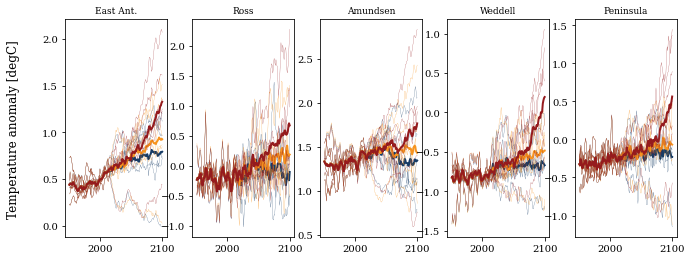

In [13]:
fig,ax = plt.subplots(1,len(ds.basin),sharex=True,figsize=(10,4))

for b,bas in enumerate(ds.basin.values):
    ax[b].set_title(bas)

    for s,ss in enumerate(ds.ssp.values):
        ax[b].plot(ds.time,np.mean(temp[:,:,s,b],axis=1),c=ut.scol[ss],lw=2)
        for e,es in enumerate(ds.esm):
            ax[b].plot(ds.time,temp[:,e,s,b],c=ut.scol[ss],lw=.2)
            
fig.supylabel('Temperature anomaly [degC]')
plt.show()

In [14]:
#Save as combined netcdf file

ds['temp'] = xr.DataArray(temp,dims=('time','esm','ssp','basin'),attrs={'unit':'degrees Celcius','long_name':'temperature anomaly from pre-industrial control'})

ds.to_netcdf(f'../data/larmiptemp.nc',mode='w')
ds.close()

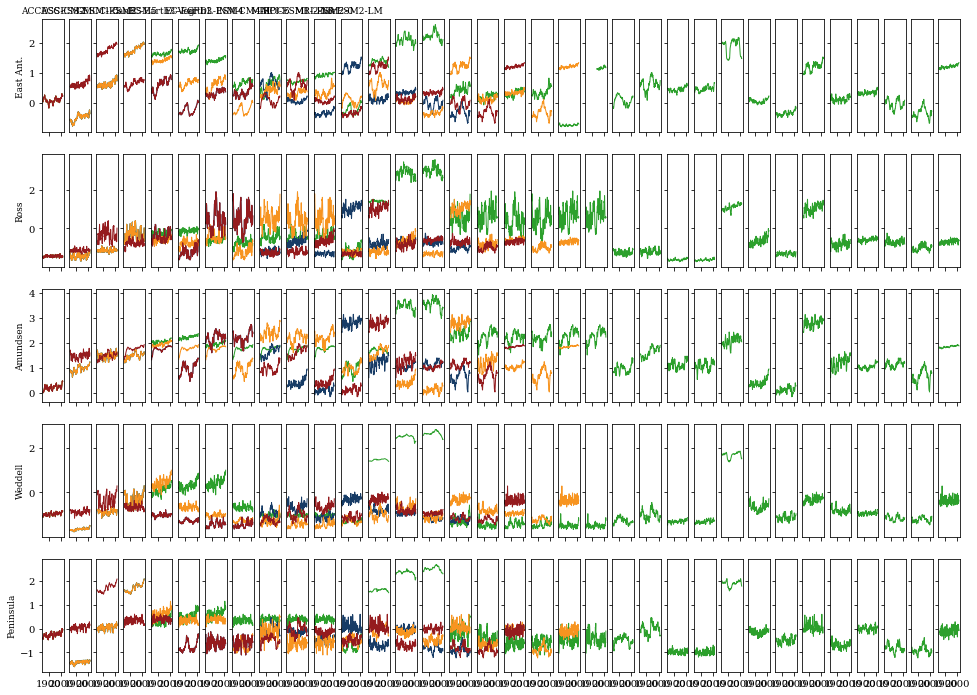

In [43]:
#Plotje voor Eveline. Detrend lijkt te verschillen tussen de SSPs. Daarom nu zonder detrend verder
option = ['']

fig,ax = plt.subplots(len(ds.basin),len(ds2.model),sharex=True,sharey='row',figsize=(15,12))

for o,opt in enumerate(option):
    ds2 = xr.open_dataset(f'../data/eveline/thetao_sector_timeseries_historical_1850_2014.nc')
    for b,eb in enumerate(evbas):
        for e,es in enumerate(ds2.model):
            temp = ds2[eb].sel(model=es).values
            ax[b,e].plot(ds2.year,temp,c='tab:green',lw=1)

for o,opt in enumerate(option):
    for s,ss in enumerate(ds.ssp.values):
        ds2 = xr.open_dataset(f'../data/eveline/thetao_sector_timeseries_historical+ssp{ss}_1850_2100.nc')
        ds2 = ds2.sel(year=slice(1850,2014))
        for b,eb in enumerate(evbas):
            for e,es in enumerate(ds2.model):
                temp = ds2[eb].sel(model=es).values
                ax[b,e].plot(ds2.year,temp,c=ut.scol[ss],lw=1)

for e,es in enumerate(ds.esm.values):
    ax[0,e].set_title(es)
                
for b,bas in enumerate(ds.basin.values):
    ax[b,0].set_ylabel(bas)
plt.show()